<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [40]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25)

In [42]:
clf = SVC(gamma = 0.001 , C=100)
clf.fit(X_train,y_train)

sv = clf.support_vectors_
intercept = clf.intercept_
coef = clf.dual_coef_

print("sklearn's decision function : ", clf.decision_function(X_cv)[:5])

def decision_function(data):
    lst = []
    for xq in data:  
        sum = 0
        for i in range(len(sv)):
            sum += (  ( coef[0][i]  *  (np.exp( -0.001 * (np.linalg.norm(sv[i]- xq))**2 ) ) ) )
        lst.append(sum+intercept) #intercept to added after summation
    flst = np.array(lst)
    return flst


fcv = decision_function(X_cv).flatten()
print("Custom Decision Function : ",fcv[:5])

sklearn's decision function :  [ 0.79925693 -0.83263201 -2.96299145 -3.33007061 -2.22950805]
Custom Decision Function :  [ 0.79925693 -0.83263201 -2.96299145 -3.33007061 -2.22950805]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [43]:
N_p = 0
N_n = 0
y_p = 0
y_n = 0

for i in y_train:
    if i==0:
        N_n+=1
    else:
        N_p+=1
        


y_p = ((N_p+1)/(N_n+2))
y_n = 1/(N_n+2)                 #calculating y_p , y_n using y_train

y_cv_new = np.where(y_cv==0, y_n, y_p)     #replace values in y_cv with y_p and y_n

print(y_cv_new[:5])

[0.41918715 0.00047259 0.00047259 0.00047259 0.00047259]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 26.10it/s]


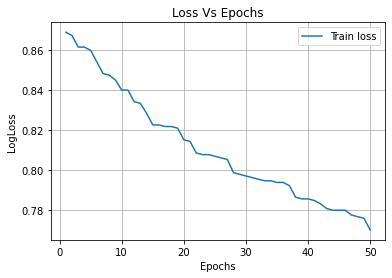

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns




def initialize_weights(dim):
    w = np.zeros_like(dim)
    b = 0 
    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1 /(1+ (np.exp(-1*z)))
    return sig

def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    ln_arr = len(y_true)
    loss = 0 
    for i in range(ln_arr):
        loss += (y_true[i] * np.log10(y_pred[i])) + ((1-y_true[i]) * np.log10(1-y_pred[i]))   
    loss = (loss * -1)/ln_arr
    return loss

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
#     dw = []
#     for i in range(len(x)):
    f = (x *( y - sigmoid (np.dot(w.T,x) + b   )  ))   -  ((alpha *w)/N)
#     dw.append(f)   
    dw = np.array(f)
    return dw

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y - sigmoid(np.dot(w.T,x) + b)
            
    return db

def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(0.99999)  #to avoid division by zero error
        else:
            predict.append(0.00001)  #to avoid division by zero error
    return np.array(predict)

def train(X_train,y_train,epochs,alpha,eta0):
    dim=X_train[0] 
    w,b = initialize_weights(dim)
    train_loss = [] #list of trainloss
    
    
    e = []          #epoch number
    for epoch in tqdm(range(epochs)):   #for every epoch
        for x , y  in zip(X_train , y_train):    #for every point 
            gw = gradient_dw(x,y,w,b,alpha,len(X_train))    
            gb = gradient_db(x,y,w,b)
            w = w + (eta0*gw)
            b = b + (eta0*gb)
        train_loss.append(logloss(y_train ,pred(w,b, X_train)))
        e.append(epoch+1)
    return w,b,train_loss,e

alpha=0.0001
eta0=0.0001
epochs=50

w,b,train_loss ,e=train(fcv, y_cv_new , epochs , alpha , eta0)

plt.plot(e, train_loss, label='Train loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("LogLoss")
plt.title("Loss Vs Epochs")
plt.grid()
plt.show()

In [46]:
df_xtest = decision_function(X_test)

for i in X_test:
    xx = 1/( 1 + np.exp( -1*(  (w * df_xtest)+b  )  )  )
    
print("P==1|X (for every pointin Xtest): ",xx[:5])  #printing first five points

P==1|X (for every pointin Xtest):  [[0.03165015]
 [0.17257785]
 [0.33546007]
 [0.51510381]
 [0.45572534]]


__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
